In [1]:
#@title Copyright 2020 Google LLC. Double-click here for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=linear_regression_synthetic_tf2-colab&hl=en

Trimmed down for my own use

# Simple Linear Regression with Synthetic Data

In this first Colab, you'll explore linear regression with a simple database. 

## Import relevant modules

The following cell imports the packages that the program requires:

In [2]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

print(tf.__version__)

2.4.1


## Define functions that build and train a model

The following code defines two functions:

  * `build_model(my_learning_rate)`, which builds an empty model.
  * `train_model(model, feature, label, epochs)`, which trains the model from the examples (feature and label) you pass. 

Since you don't need to understand model building code right now, we've hidden this code cell.  You may optionally double-click the headline to explore this code.

In [15]:
def build_model(my_learning_rate):
    """Create and compile a simple linear regression model."""
    model = tf.keras.models.Sequential()

    # simple linear regression model
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

    # Compile the model topography into code that 
    # TensorFlow can efficiently execute. Configure 
    # training to minimize the model's mean squared error. 
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                  loss="mean_squared_error",
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])

    return model           


def train_model(model, feature, label, epochs, batch_size):
    """Train the model by feeding it data."""
    history = model.fit(x=feature, y=label, batch_size=batch_size, epochs=epochs)

    # Gather the trained model's weight and bias.
    trained_weight, trained_bias = model.get_weights()

    # The list of epochs is stored separately from the 
    # rest of history.
    epochs = history.epoch
  
    # Gather the history (a snapshot) of each epoch.
    hist = pd.DataFrame(history.history)

    # Specifically gather the model's root mean 
    # squared error at each epoch. 
    rmse = hist["root_mean_squared_error"]

    return trained_weight, trained_bias, epochs, rmse

## Define plotting functions

*  a plot of the feature values vs. the label values, and a line showing the output of the trained model.
*  a [loss curve](https://developers.google.com/machine-learning/glossary/#loss_curve).

In [16]:
def plot_the_model(trained_weight, trained_bias, feature, label):
    """Plot the trained model against the training feature and label."""
    plt.xlabel("feature")
    plt.ylabel("label")

    # Plot the feature values vs. label values.
    plt.scatter(feature, label)

    # Create a red line representing the model. The red line starts
    # at coordinates (x0, y0) and ends at coordinates (x1, y1).
    x0 = 0
    y0 = trained_bias
    x1 = my_feature[-1]
    y1 = trained_bias + (trained_weight * x1)
    plt.plot([x0, x1], [y0, y1], c='r')

    # Render the scatter plot and the red line.
    plt.show()


def plot_the_loss_curve(epochs, rmse):
    """Plot the loss curve, which shows loss vs. epoch."""
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")

    plt.plot(epochs, rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min()*0.97, rmse.max()])
    plt.show()

## Define the dataset

The dataset consists of 12 [examples](https://developers.google.com/machine-learning/glossary/#example). Each example consists of one [feature](https://developers.google.com/machine-learning/glossary/#feature) and one [label](https://developers.google.com/machine-learning/glossary/#label).


In [17]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

## Specify the hyperparameters

The hyperparameters are as follows:

  * [learning rate](https://developers.google.com/machine-learning/glossary/#learning_rate)
  * [epochs](https://developers.google.com/machine-learning/glossary/#epoch)
  * [batch_size](https://developers.google.com/machine-learning/glossary/#batch_size)

The following code cell initializes these hyperparameters and then invokes the functions that build and train the model.

Epoch 1/10
1/1 [==============================] - 0s 142ms/step - loss: 541.9274 - root_mean_squared_error: 23.2793
Epoch 2/10
1/1 [==============================] - 0s 2ms/step - loss: 529.8505 - root_mean_squared_error: 23.0185
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 521.2206 - root_mean_squared_error: 22.8303
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 514.0724 - root_mean_squared_error: 22.6732
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 507.7838 - root_mean_squared_error: 22.5341
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 502.0664 - root_mean_squared_error: 22.4068
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 496.7599 - root_mean_squared_error: 22.2881
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 491.7646 - root_mean_squared_error: 22.1758
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 487.0139 - root_

/home/tb/.virtualenvs/dev/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


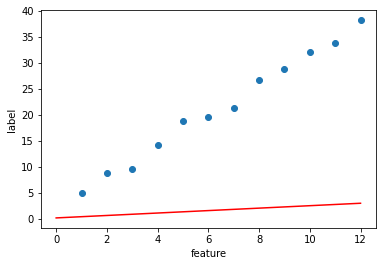

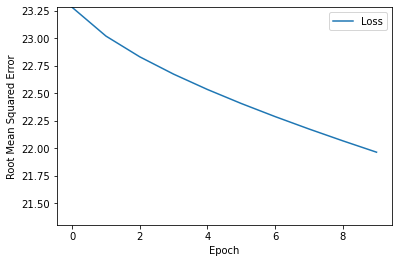

In [18]:
learning_rate = 0.01
epochs = 10
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(
    my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Task 1: Examine the graphs

Examine the top graph. The blue dots identify the actual data; the red line identifies the output of the trained model. Ideally, the red line should align nicely with the blue dots.  Does it?  Probably not.

A certain amount of randomness plays into training a model, so you'll get somewhat different results every time you train.  That said, unless you are an extremely lucky person, the red line probably *doesn't* align nicely with the blue dots.  

Examine the bottom graph, which shows the loss curve. Notice that the loss curve decreases but doesn't flatten out, which is a sign that the model hasn't trained sufficiently.

## Task 2: Increase the number of epochs

Training loss should steadily decrease, steeply at first, and then more slowly. Eventually, training loss should eventually stay steady (zero slope or nearly zero slope), which indicates that training has [converged](http://developers.google.com/machine-learning/glossary/#convergence).

In Task 1, the training loss did not converge. One possible solution is to train for more epochs.  Your task is to increase the number of epochs sufficiently to get the model to converge. However, it is inefficient to train past convergence, so don't just set the number of epochs to an arbitrarily high value.

Examine the loss curve. Does the model converge?

Epoch 1/500
1/1 [==============================] - 0s 148ms/step - loss: 1287.3768 - root_mean_squared_error: 35.8800
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 1268.7233 - root_mean_squared_error: 35.6191
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 1255.3224 - root_mean_squared_error: 35.4305
Epoch 4/500
1/1 [==============================] - 0s 3ms/step - loss: 1244.1796 - root_mean_squared_error: 35.2729
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 1234.3452 - root_mean_squared_error: 35.1333
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 1225.3788 - root_mean_squared_error: 35.0054
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 1217.0353 - root_mean_squared_error: 34.8860
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 1209.1620 - root_mean_squared_error: 34.7730
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss:

1/1 [==============================] - 0s 3ms/step - loss: 868.3386 - root_mean_squared_error: 29.4676
Epoch 72/500
1/1 [==============================] - 0s 3ms/step - loss: 863.6014 - root_mean_squared_error: 29.3871
Epoch 73/500
1/1 [==============================] - 0s 2ms/step - loss: 858.8776 - root_mean_squared_error: 29.3066
Epoch 74/500
1/1 [==============================] - 0s 2ms/step - loss: 854.1674 - root_mean_squared_error: 29.2261
Epoch 75/500
1/1 [==============================] - 0s 2ms/step - loss: 849.4705 - root_mean_squared_error: 29.1457
Epoch 76/500
1/1 [==============================] - 0s 2ms/step - loss: 844.7869 - root_mean_squared_error: 29.0652
Epoch 77/500
1/1 [==============================] - 0s 2ms/step - loss: 840.1169 - root_mean_squared_error: 28.9848
Epoch 78/500
1/1 [==============================] - 0s 3ms/step - loss: 835.4602 - root_mean_squared_error: 28.9043
Epoch 79/500
1/1 [==============================] - 0s 3ms/step - loss: 830.8167 - ro

1/1 [==============================] - 0s 4ms/step - loss: 568.8692 - root_mean_squared_error: 23.8510
Epoch 142/500
1/1 [==============================] - 0s 3ms/step - loss: 565.0613 - root_mean_squared_error: 23.7710
Epoch 143/500
1/1 [==============================] - 0s 2ms/step - loss: 561.2665 - root_mean_squared_error: 23.6911
Epoch 144/500
1/1 [==============================] - 0s 2ms/step - loss: 557.4850 - root_mean_squared_error: 23.6111
Epoch 145/500
1/1 [==============================] - 0s 2ms/step - loss: 553.7167 - root_mean_squared_error: 23.5312
Epoch 146/500
1/1 [==============================] - 0s 2ms/step - loss: 549.9617 - root_mean_squared_error: 23.4513
Epoch 147/500
1/1 [==============================] - 0s 2ms/step - loss: 546.2197 - root_mean_squared_error: 23.3713
Epoch 148/500
1/1 [==============================] - 0s 2ms/step - loss: 542.4910 - root_mean_squared_error: 23.2914
Epoch 149/500
1/1 [==============================] - 0s 3ms/step - loss: 538.7

1/1 [==============================] - 0s 3ms/step - loss: 334.1235 - root_mean_squared_error: 18.2790
Epoch 212/500
1/1 [==============================] - 0s 2ms/step - loss: 331.2361 - root_mean_squared_error: 18.1999
Epoch 213/500
1/1 [==============================] - 0s 2ms/step - loss: 328.3617 - root_mean_squared_error: 18.1208
Epoch 214/500
1/1 [==============================] - 0s 3ms/step - loss: 325.5005 - root_mean_squared_error: 18.0416
Epoch 215/500
1/1 [==============================] - 0s 3ms/step - loss: 322.6523 - root_mean_squared_error: 17.9625
Epoch 216/500
1/1 [==============================] - 0s 4ms/step - loss: 319.8171 - root_mean_squared_error: 17.8834
Epoch 217/500
1/1 [==============================] - 0s 2ms/step - loss: 316.9950 - root_mean_squared_error: 17.8044
Epoch 218/500
1/1 [==============================] - 0s 3ms/step - loss: 314.1860 - root_mean_squared_error: 17.7253
Epoch 219/500
1/1 [==============================] - 0s 3ms/step - loss: 311.3

1/1 [==============================] - 0s 4ms/step - loss: 163.4328 - root_mean_squared_error: 12.7841
Epoch 282/500
1/1 [==============================] - 0s 3ms/step - loss: 161.4536 - root_mean_squared_error: 12.7064
Epoch 283/500
1/1 [==============================] - 0s 2ms/step - loss: 159.4872 - root_mean_squared_error: 12.6288
Epoch 284/500
1/1 [==============================] - 0s 3ms/step - loss: 157.5337 - root_mean_squared_error: 12.5512
Epoch 285/500
1/1 [==============================] - 0s 3ms/step - loss: 155.5930 - root_mean_squared_error: 12.4737
Epoch 286/500
1/1 [==============================] - 0s 4ms/step - loss: 153.6652 - root_mean_squared_error: 12.3962
Epoch 287/500
1/1 [==============================] - 0s 4ms/step - loss: 151.7501 - root_mean_squared_error: 12.3187
Epoch 288/500
1/1 [==============================] - 0s 3ms/step - loss: 149.8479 - root_mean_squared_error: 12.2412
Epoch 289/500
1/1 [==============================] - 0s 2ms/step - loss: 147.9

1/1 [==============================] - 0s 3ms/step - loss: 55.5664 - root_mean_squared_error: 7.4543
Epoch 352/500
1/1 [==============================] - 0s 6ms/step - loss: 54.4700 - root_mean_squared_error: 7.3804
Epoch 353/500
1/1 [==============================] - 0s 2ms/step - loss: 53.3858 - root_mean_squared_error: 7.3066
Epoch 354/500
1/1 [==============================] - 0s 3ms/step - loss: 52.3139 - root_mean_squared_error: 7.2328
Epoch 355/500
1/1 [==============================] - 0s 3ms/step - loss: 51.2542 - root_mean_squared_error: 7.1592
Epoch 356/500
1/1 [==============================] - 0s 3ms/step - loss: 50.2068 - root_mean_squared_error: 7.0857
Epoch 357/500
1/1 [==============================] - 0s 3ms/step - loss: 49.1716 - root_mean_squared_error: 7.0122
Epoch 358/500
1/1 [==============================] - 0s 3ms/step - loss: 48.1486 - root_mean_squared_error: 6.9389
Epoch 359/500
1/1 [==============================] - 0s 3ms/step - loss: 47.1378 - root_mean_s

1/1 [==============================] - 0s 3ms/step - loss: 7.0576 - root_mean_squared_error: 2.6566
Epoch 423/500
1/1 [==============================] - 0s 3ms/step - loss: 6.7719 - root_mean_squared_error: 2.6023
Epoch 424/500
1/1 [==============================] - 0s 2ms/step - loss: 6.4960 - root_mean_squared_error: 2.5487
Epoch 425/500
1/1 [==============================] - 0s 2ms/step - loss: 6.2297 - root_mean_squared_error: 2.4959
Epoch 426/500
1/1 [==============================] - 0s 3ms/step - loss: 5.9730 - root_mean_squared_error: 2.4440
Epoch 427/500
1/1 [==============================] - 0s 3ms/step - loss: 5.7258 - root_mean_squared_error: 2.3929
Epoch 428/500
1/1 [==============================] - 0s 4ms/step - loss: 5.4879 - root_mean_squared_error: 2.3426
Epoch 429/500
1/1 [==============================] - 0s 3ms/step - loss: 5.2593 - root_mean_squared_error: 2.2933
Epoch 430/500
1/1 [==============================] - 0s 3ms/step - loss: 5.0399 - root_mean_squared_er

Epoch 494/500
1/1 [==============================] - 0s 3ms/step - loss: 1.5458 - root_mean_squared_error: 1.2433
Epoch 495/500
1/1 [==============================] - 0s 3ms/step - loss: 1.5380 - root_mean_squared_error: 1.2402
Epoch 496/500
1/1 [==============================] - 0s 3ms/step - loss: 1.5303 - root_mean_squared_error: 1.2371
Epoch 497/500
1/1 [==============================] - 0s 3ms/step - loss: 1.5227 - root_mean_squared_error: 1.2340
Epoch 498/500
1/1 [==============================] - 0s 2ms/step - loss: 1.5151 - root_mean_squared_error: 1.2309
Epoch 499/500
1/1 [==============================] - 0s 3ms/step - loss: 1.5076 - root_mean_squared_error: 1.2278
Epoch 500/500
1/1 [==============================] - 0s 5ms/step - loss: 1.5001 - root_mean_squared_error: 1.2248


/home/tb/.virtualenvs/dev/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


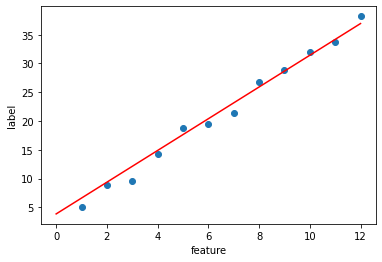

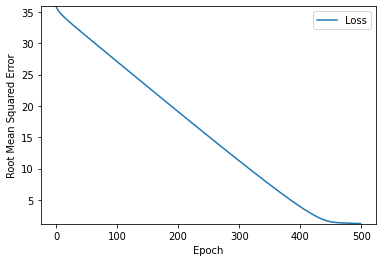

In [21]:
learning_rate = 0.01
epochs = 500   # Replace ? with an integer.
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(
    my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Task 3: Increase the learning rate

In Task 2, you increased the number of epochs to get the model to converge. Sometimes, you can get the model to converge more quickly by increasing the learning rate. However, setting the learning rate too high often makes it impossible for a model to converge. In Task 3, we've intentionally set the learning rate too high. Run the following code cell and see what happens.

Epoch 1/500
1/1 [==============================] - 0s 149ms/step - loss: 1220.6176 - root_mean_squared_error: 34.9373
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 6635584.5000 - root_mean_squared_error: 2575.9629
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 1205.6036 - root_mean_squared_error: 34.7218
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 7.3451 - root_mean_squared_error: 2.7102
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 1.7868 - root_mean_squared_error: 1.3367
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 1.6507 - root_mean_squared_error: 1.2848
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 1.5981 - root_mean_squared_error: 1.2641
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 1.5488 - root_mean_squared_error: 1.2445
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 1.5007 - root_

1/1 [==============================] - 0s 2ms/step - loss: 125718.3516 - root_mean_squared_error: 354.5678
Epoch 72/500
1/1 [==============================] - 0s 6ms/step - loss: 104241.1641 - root_mean_squared_error: 322.8640
Epoch 73/500
1/1 [==============================] - 0s 3ms/step - loss: 94919.3750 - root_mean_squared_error: 308.0899
Epoch 74/500
1/1 [==============================] - 0s 6ms/step - loss: 95235.2578 - root_mean_squared_error: 308.6021
Epoch 75/500
1/1 [==============================] - 0s 3ms/step - loss: 104444.1875 - root_mean_squared_error: 323.1783
Epoch 76/500
1/1 [==============================] - 0s 4ms/step - loss: 122925.9453 - root_mean_squared_error: 350.6080
Epoch 77/500
1/1 [==============================] - 0s 3ms/step - loss: 150851.7969 - root_mean_squared_error: 388.3965
Epoch 78/500
1/1 [==============================] - 0s 3ms/step - loss: 185715.9844 - root_mean_squared_error: 430.9478
Epoch 79/500
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 3ms/step - loss: 170077.2969 - root_mean_squared_error: 412.4043
Epoch 140/500
1/1 [==============================] - 0s 3ms/step - loss: 168894.9219 - root_mean_squared_error: 410.9683
Epoch 141/500
1/1 [==============================] - 0s 3ms/step - loss: 168137.4844 - root_mean_squared_error: 410.0457
Epoch 142/500
1/1 [==============================] - 0s 3ms/step - loss: 167907.0469 - root_mean_squared_error: 409.7646
Epoch 143/500
1/1 [==============================] - 0s 2ms/step - loss: 168194.8125 - root_mean_squared_error: 410.1156
Epoch 144/500
1/1 [==============================] - 0s 3ms/step - loss: 168894.6406 - root_mean_squared_error: 410.9679
Epoch 145/500
1/1 [==============================] - 0s 3ms/step - loss: 169830.4844 - root_mean_squared_error: 412.1049
Epoch 146/500
1/1 [==============================] - 0s 2ms/step - loss: 170794.8750 - root_mean_squared_error: 413.2734
Epoch 147/500
1/1 [===========================

1/1 [==============================] - 0s 3ms/step - loss: 170457.2031 - root_mean_squared_error: 412.8646
Epoch 207/500
1/1 [==============================] - 0s 3ms/step - loss: 170418.6406 - root_mean_squared_error: 412.8179
Epoch 208/500
1/1 [==============================] - 0s 3ms/step - loss: 170383.6562 - root_mean_squared_error: 412.7755
Epoch 209/500
1/1 [==============================] - 0s 2ms/step - loss: 170358.9531 - root_mean_squared_error: 412.7456
Epoch 210/500
1/1 [==============================] - 0s 2ms/step - loss: 170348.5000 - root_mean_squared_error: 412.7330
Epoch 211/500
1/1 [==============================] - 0s 3ms/step - loss: 170352.8594 - root_mean_squared_error: 412.7383
Epoch 212/500
1/1 [==============================] - 0s 3ms/step - loss: 170369.6875 - root_mean_squared_error: 412.7586
Epoch 213/500
1/1 [==============================] - 0s 4ms/step - loss: 170394.4219 - root_mean_squared_error: 412.7886
Epoch 214/500
1/1 [===========================

1/1 [==============================] - 0s 2ms/step - loss: 170419.9375 - root_mean_squared_error: 412.8195
Epoch 274/500
1/1 [==============================] - 0s 4ms/step - loss: 170418.9375 - root_mean_squared_error: 412.8183
Epoch 275/500
1/1 [==============================] - 0s 2ms/step - loss: 170417.8594 - root_mean_squared_error: 412.8170
Epoch 276/500
1/1 [==============================] - 0s 3ms/step - loss: 170416.8594 - root_mean_squared_error: 412.8158
Epoch 277/500
1/1 [==============================] - 0s 5ms/step - loss: 170416.0469 - root_mean_squared_error: 412.8148
Epoch 278/500
1/1 [==============================] - 0s 2ms/step - loss: 170415.6406 - root_mean_squared_error: 412.8143
Epoch 279/500
1/1 [==============================] - 0s 3ms/step - loss: 170415.5469 - root_mean_squared_error: 412.8142
Epoch 280/500
1/1 [==============================] - 0s 5ms/step - loss: 170415.8594 - root_mean_squared_error: 412.8145
Epoch 281/500
1/1 [===========================

1/1 [==============================] - 0s 3ms/step - loss: 170417.6094 - root_mean_squared_error: 412.8167
Epoch 341/500
1/1 [==============================] - 0s 2ms/step - loss: 170417.7031 - root_mean_squared_error: 412.8168
Epoch 342/500
1/1 [==============================] - 0s 2ms/step - loss: 170417.6875 - root_mean_squared_error: 412.8168
Epoch 343/500
1/1 [==============================] - 0s 3ms/step - loss: 170417.6094 - root_mean_squared_error: 412.8167
Epoch 344/500
1/1 [==============================] - 0s 2ms/step - loss: 170417.5469 - root_mean_squared_error: 412.8166
Epoch 345/500
1/1 [==============================] - 0s 2ms/step - loss: 170417.5469 - root_mean_squared_error: 412.8166
Epoch 346/500
1/1 [==============================] - 0s 4ms/step - loss: 170417.4531 - root_mean_squared_error: 412.8165
Epoch 347/500
1/1 [==============================] - 0s 3ms/step - loss: 170417.5469 - root_mean_squared_error: 412.8166
Epoch 348/500
1/1 [===========================

1/1 [==============================] - 0s 3ms/step - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 408/500
1/1 [==============================] - 0s 4ms/step - loss: 170417.6875 - root_mean_squared_error: 412.8168
Epoch 409/500
1/1 [==============================] - 0s 2ms/step - loss: 170417.7969 - root_mean_squared_error: 412.8169
Epoch 410/500
1/1 [==============================] - 0s 2ms/step - loss: 170417.7656 - root_mean_squared_error: 412.8169
Epoch 411/500
1/1 [==============================] - 0s 3ms/step - loss: 170417.7031 - root_mean_squared_error: 412.8168
Epoch 412/500
1/1 [==============================] - 0s 4ms/step - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 413/500
1/1 [==============================] - 0s 2ms/step - loss: 170417.5781 - root_mean_squared_error: 412.8167
Epoch 414/500
1/1 [==============================] - 0s 3ms/step - loss: 170417.5156 - root_mean_squared_error: 412.8166
Epoch 415/500
1/1 [===========================

1/1 [==============================] - 0s 3ms/step - loss: 170417.3594 - root_mean_squared_error: 412.8164
Epoch 475/500
1/1 [==============================] - 0s 3ms/step - loss: 170417.4844 - root_mean_squared_error: 412.8165
Epoch 476/500
1/1 [==============================] - 0s 3ms/step - loss: 170417.7031 - root_mean_squared_error: 412.8168
Epoch 477/500
1/1 [==============================] - 0s 4ms/step - loss: 170417.7500 - root_mean_squared_error: 412.8168
Epoch 478/500
1/1 [==============================] - 0s 2ms/step - loss: 170417.8281 - root_mean_squared_error: 412.8170
Epoch 479/500
1/1 [==============================] - 0s 3ms/step - loss: 170417.8125 - root_mean_squared_error: 412.8169
Epoch 480/500
1/1 [==============================] - 0s 3ms/step - loss: 170417.7344 - root_mean_squared_error: 412.8168
Epoch 481/500
1/1 [==============================] - 0s 3ms/step - loss: 170417.6094 - root_mean_squared_error: 412.8167
Epoch 482/500
1/1 [===========================

/home/tb/.virtualenvs/dev/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


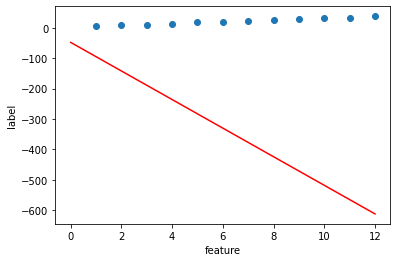

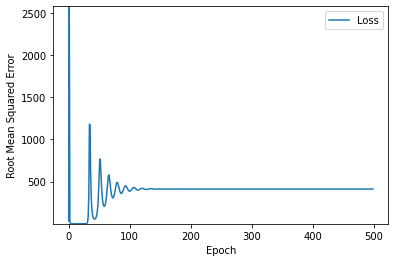

In [24]:
# Increase the learning rate and decrease the number of epochs.
learning_rate = 100 
epochs = 500 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(
    my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

The resulting model is terrible; the red line doesn't align with the blue dots. Furthermore, the loss curve oscillates like a [roller coaster](https://www.wikipedia.org/wiki/Roller_coaster).  An oscillating loss curve strongly suggests that the learning rate is too high. 

## Task 4: Find the ideal combination of epochs and learning rate

Assign values to the following two hyperparameters to make training converge as efficiently as possible: 

*  learning_rate
*  epochs

Epoch 1/80
1/1 [==============================] - 0s 156ms/step - loss: 763.4890 - root_mean_squared_error: 27.6313
Epoch 2/80
1/1 [==============================] - 0s 2ms/step - loss: 626.1330 - root_mean_squared_error: 25.0226
Epoch 3/80
1/1 [==============================] - 0s 1ms/step - loss: 539.2546 - root_mean_squared_error: 23.2219
Epoch 4/80
1/1 [==============================] - 0s 3ms/step - loss: 473.6021 - root_mean_squared_error: 21.7624
Epoch 5/80
1/1 [==============================] - 0s 3ms/step - loss: 420.2911 - root_mean_squared_error: 20.5010
Epoch 6/80
1/1 [==============================] - 0s 4ms/step - loss: 375.2854 - root_mean_squared_error: 19.3723
Epoch 7/80
1/1 [==============================] - 0s 3ms/step - loss: 336.3647 - root_mean_squared_error: 18.3402
Epoch 8/80
1/1 [==============================] - 0s 3ms/step - loss: 302.1594 - root_mean_squared_error: 17.3827
Epoch 9/80
1/1 [==============================] - 0s 3ms/step - loss: 271.7568 - root_

1/1 [==============================] - 0s 3ms/step - loss: 1.0164 - root_mean_squared_error: 1.0082
Epoch 74/80
1/1 [==============================] - 0s 5ms/step - loss: 1.0102 - root_mean_squared_error: 1.0051
Epoch 75/80
1/1 [==============================] - 0s 6ms/step - loss: 1.0040 - root_mean_squared_error: 1.0020
Epoch 76/80
1/1 [==============================] - 0s 5ms/step - loss: 0.9978 - root_mean_squared_error: 0.9989
Epoch 77/80
1/1 [==============================] - 0s 3ms/step - loss: 0.9916 - root_mean_squared_error: 0.9958
Epoch 78/80
1/1 [==============================] - 0s 4ms/step - loss: 0.9854 - root_mean_squared_error: 0.9927
Epoch 79/80
1/1 [==============================] - 0s 3ms/step - loss: 0.9792 - root_mean_squared_error: 0.9895
Epoch 80/80
1/1 [==============================] - 0s 3ms/step - loss: 0.9730 - root_mean_squared_error: 0.9864


/home/tb/.virtualenvs/dev/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


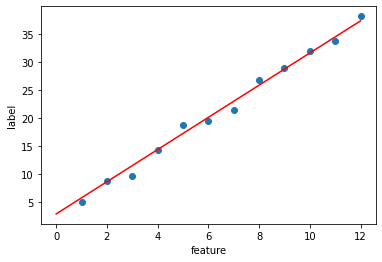

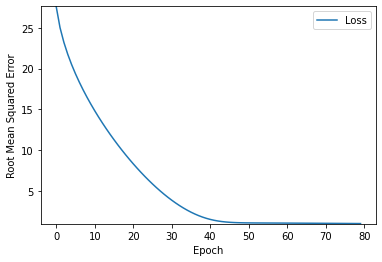

In [26]:
# Set the learning rate and number of epochs
learning_rate = 0.1  # Replace ? with a floating-point number
epochs = 80   # Replace ? with an integer

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(
    my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Task 5: Adjust the batch size

The system recalculates the model's loss value and adjusts the model's weights and bias after each **iteration**.  Each iteration is the span in which the system processes one batch. For example, if the **batch size** is 6, then the system recalculates the model's loss value and adjusts the model's weights and bias after processing every 6 examples.  

One **epoch** spans sufficient iterations to process every example in the dataset. For example, if the batch size is 12, then each epoch lasts one iteration. However, if the batch size is 6, then each epoch consumes two iterations.  

It is tempting to simply set the batch size to the number of examples in the dataset (12, in this case). However, the model might actually train faster on smaller batches. Conversely, very small batches might not contain enough information to help the model converge. 

Experiment with `batch_size` in the following code cell. What's the smallest integer you can set for `batch_size` and still have the model converge in a hundred epochs?

Epoch 1/100
12/12 [==============================] - 0s 426us/step - loss: 1528.8369 - root_mean_squared_error: 38.5502
Epoch 2/100
12/12 [==============================] - 0s 417us/step - loss: 800.5932 - root_mean_squared_error: 28.1295
Epoch 3/100
12/12 [==============================] - 0s 518us/step - loss: 533.1659 - root_mean_squared_error: 22.3000
Epoch 4/100
12/12 [==============================] - 0s 922us/step - loss: 609.9628 - root_mean_squared_error: 24.3316
Epoch 5/100
12/12 [==============================] - 0s 782us/step - loss: 418.8430 - root_mean_squared_error: 20.3616
Epoch 6/100
12/12 [==============================] - 0s 1ms/step - loss: 211.0448 - root_mean_squared_error: 14.3858
Epoch 7/100
12/12 [==============================] - 0s 958us/step - loss: 110.3593 - root_mean_squared_error: 10.3560
Epoch 8/100
12/12 [==============================] - 0s 1ms/step - loss: 104.7067 - root_mean_squared_error: 10.1174
Epoch 9/100
12/12 [==============================] 

12/12 [==============================] - 0s 1ms/step - loss: 1.0735 - root_mean_squared_error: 0.9933
Epoch 72/100
12/12 [==============================] - 0s 999us/step - loss: 1.2967 - root_mean_squared_error: 1.1286
Epoch 73/100
12/12 [==============================] - 0s 654us/step - loss: 0.8085 - root_mean_squared_error: 0.8796
Epoch 74/100
12/12 [==============================] - 0s 848us/step - loss: 1.0520 - root_mean_squared_error: 0.9752
Epoch 75/100
12/12 [==============================] - 0s 810us/step - loss: 1.4551 - root_mean_squared_error: 1.2001
Epoch 76/100
12/12 [==============================] - 0s 647us/step - loss: 0.5558 - root_mean_squared_error: 0.7164
Epoch 77/100
12/12 [==============================] - 0s 882us/step - loss: 1.2217 - root_mean_squared_error: 1.0611
Epoch 78/100
12/12 [==============================] - 0s 799us/step - loss: 0.7048 - root_mean_squared_error: 0.7750
Epoch 79/100
12/12 [==============================] - 0s 803us/step - loss: 1.1

/home/tb/.virtualenvs/dev/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


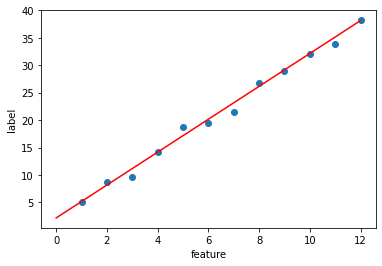

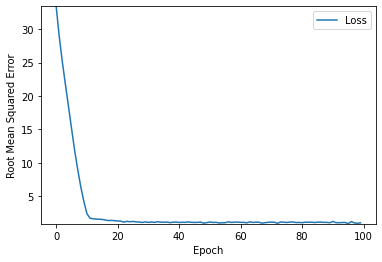

In [27]:
learning_rate = 0.05
epochs = 100
my_batch_size = 1  # Replace ? with an integer.

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(
    my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Summary of hyperparameter tuning

Most machine learning problems require a lot of hyperparameter tuning.  Unfortunately, we can't provide concrete tuning rules for every model. Lowering the learning rate can help one model converge efficiently but make another model converge much too slowly.  You must experiment to find the best set of hyperparameters for your dataset. That said, here are a few rules of thumb:

 * Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero. 
 * If the training loss does not converge, train for more epochs.
 * If the training loss decreases too slowly, increase the learning rate. Note that setting the learning rate too high may also prevent training loss from converging.
 * If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.
 * Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.
 * Setting the batch size to a *very* small batch number can also cause instability. First, try large batch size values. Then, decrease the batch size until you see degradation.
 * For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory. 

Remember: the ideal combination of hyperparameters is data dependent, so you must always experiment and verify.